# Alucar - Analisando as Vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidades de linhas e colunas: ', alucar.shape)

Quantidades de linhas e colunas:  (24, 2)


In [6]:
print('Quantidade de dados nnulos: ', alucar.isna().sum().sum())

Quantidade de dados nnulos:  0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

In [10]:
print(sns.__version__)

0.9.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

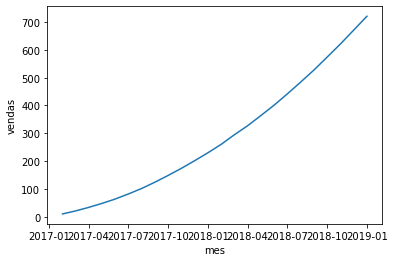

In [11]:
sns.lineplot(x='mes', y='vendas', data=alucar)

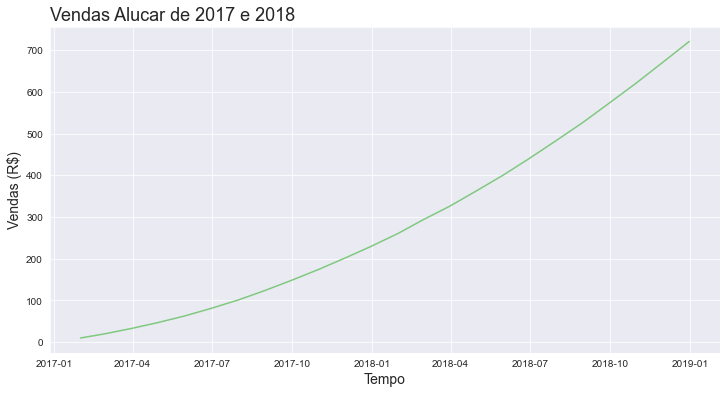

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


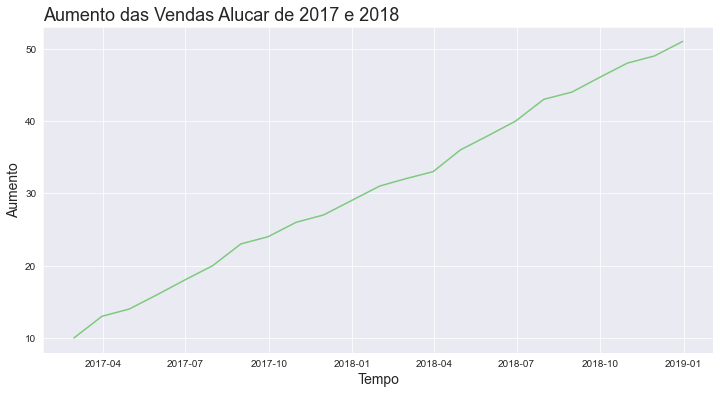

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax


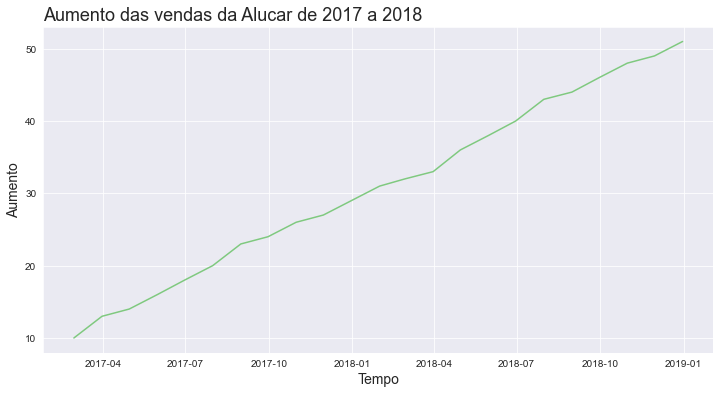

In [16]:
plotar('Aumento das vendas da Alucar de 2017 a 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


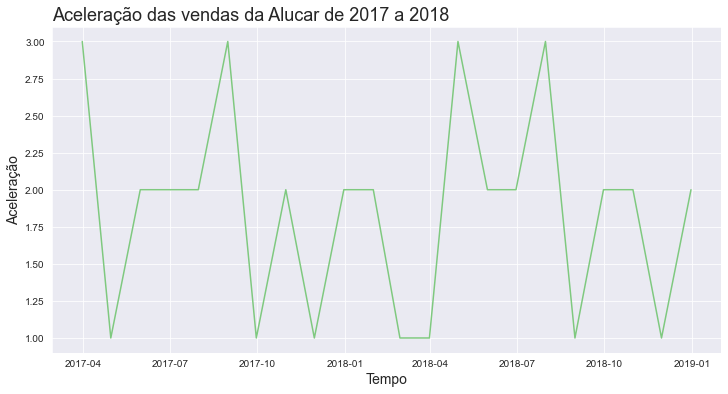

In [18]:
plotar('Aceleração das vendas da Alucar de 2017 a 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

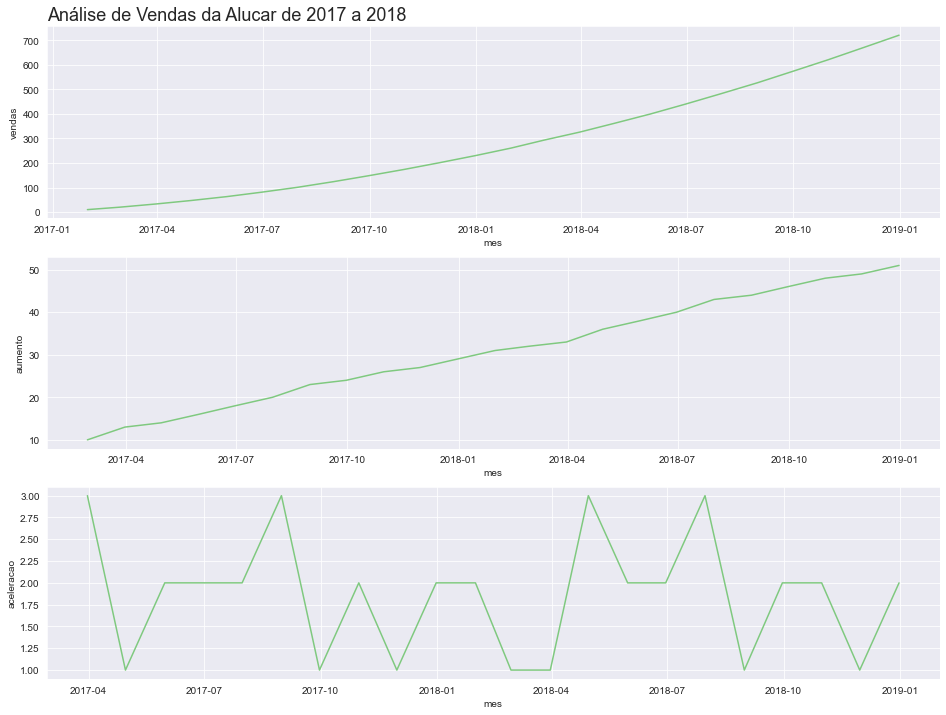

In [19]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

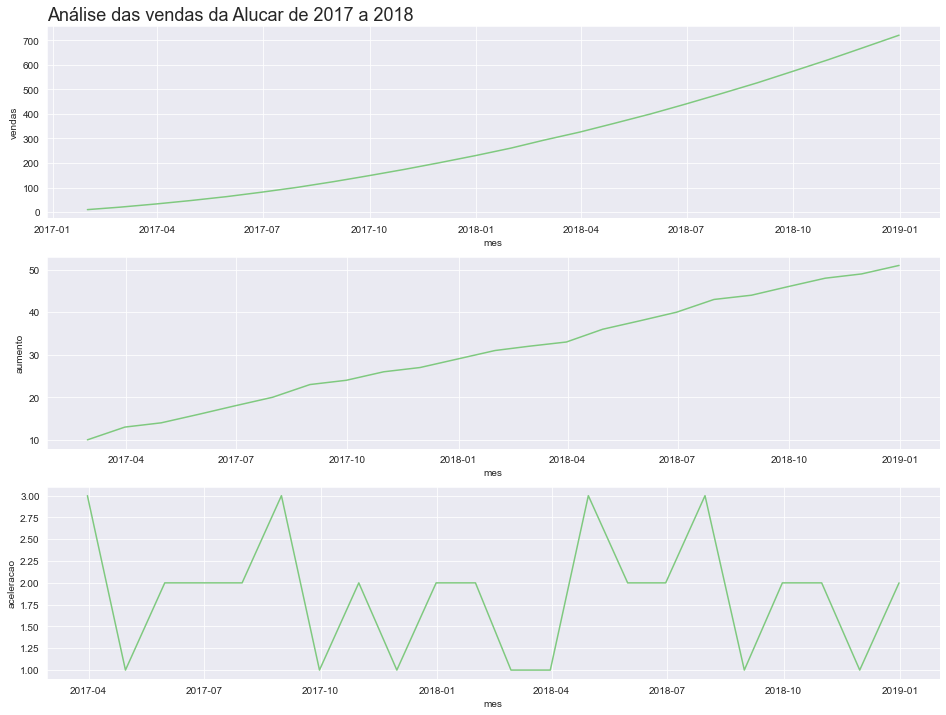

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 a 2018')

In [22]:
from pandas.plotting import autocorrelation_plot

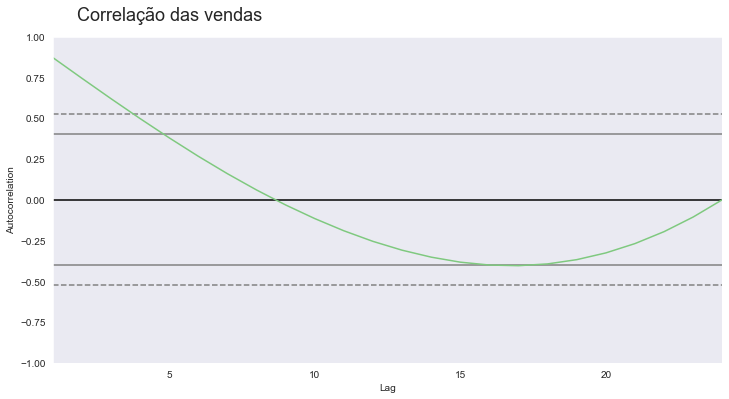

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

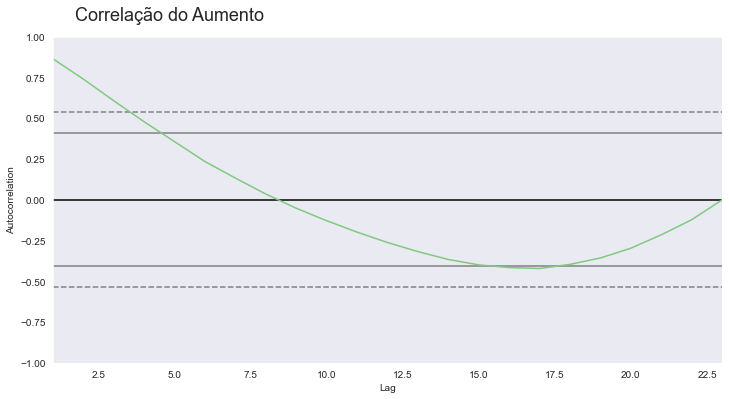

In [24]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax


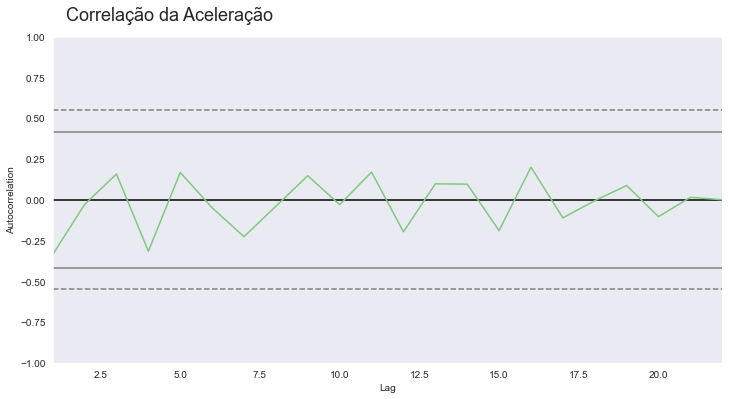

In [25]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax


# Alucar - Analisando assinantes da newsletter

In [26]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [32]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


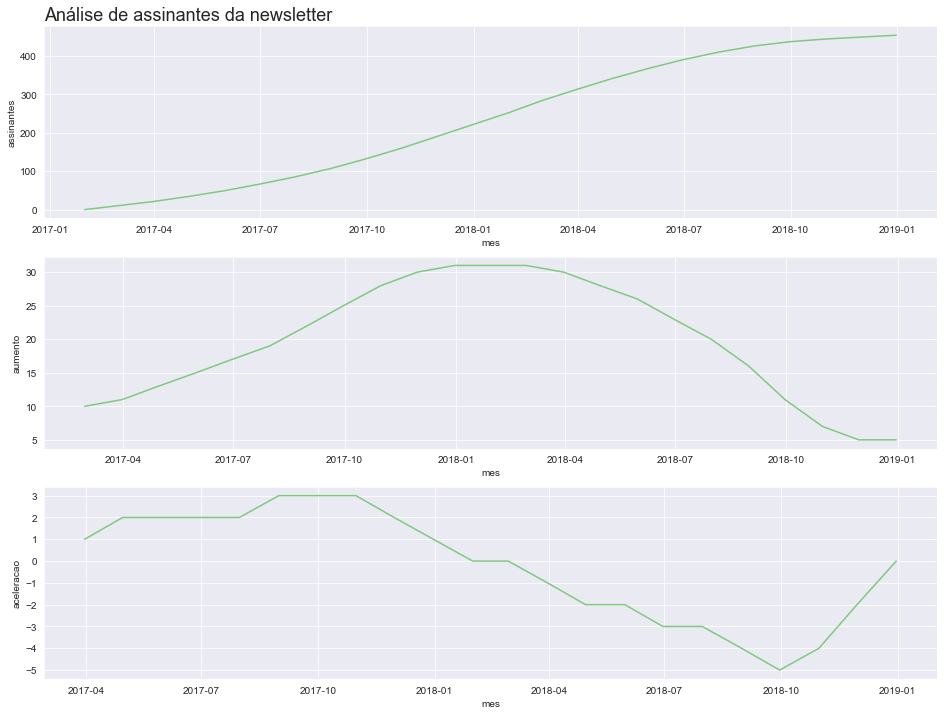

In [33]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - analisando as vendas

In [34]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [35]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [36]:
print('Quantidade de linhas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas:  (24, 2)
Quantidade de dados nulos:  0


In [39]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleração,aceleracao
0,2017-01-01,210,NaN,NaN,NaN
1,2017-02-01,185,-25.0,NaN,NaN
2,2017-03-01,209,24.0,49.0,49.0
3,2017-04-01,280,71.0,47.0,47.0
4,2017-05-01,211,-69.0,-140.0,-140.0


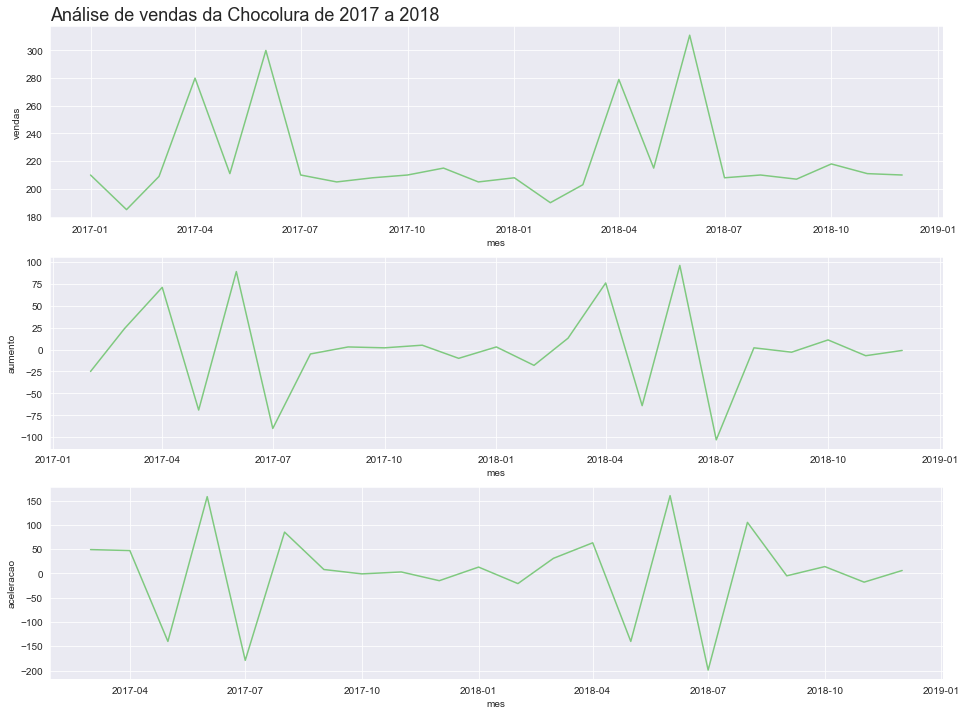

In [40]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')